In [ ]:
import tensorflow as tf

tf.__version__

# load in data
# 28*28 size images
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize( x_train, axis=1 )
x_test = tf.keras.utils.normalize( x_test, axis=1 )

In [ ]:
def binaryData(feature):
  nda = []
  rows = feature.shape[0]
  cols = feature.shape[1]
  for x in range(0, cols):
    r = []
    for y in range(0, rows):
      v = feature[x, y]
      if np.isnan(v):
        v=0
        print("================")
      if v>0:
        v=1
      else:
        v=0
      #v = int(v)
      #print(v, end=" ")
      r.append(v)
    #print()
    nda.append(r)
  nda = np.array(nda)
  #print( type(nda) )
  #print( nda.shape )
  return nda

def binarySet(tmp_set, size):
  empt_array = np.empty((size ,28, 28), int)
  for i in range(0, size):
    #binaryData( tmp_set[i] )
    empt_array[i] = binaryData( tmp_set[i] )
  return empt_array

size = len(x_train)
tmp_train = binarySet( x_train, size )
size = len(x_test)
tmp_test = binarySet( x_test, size )
print( type(x_train[0]) )
print( x_train[0].shape )
print( type(tmp_train[0]) )
print( tmp_train.shape )
print( type(x_test[0]) )
print( x_test[0].shape )
print( type(tmp_test[0]) )
print( tmp_test.shape )

x_train = tmp_train
x_test = tmp_test

<class 'numpy.ndarray'>
(28, 28)
<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(28, 28)
<class 'numpy.ndarray'>
(10000, 28, 28)


In [ ]:
# train model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense( 128, activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense( 128, activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense( 10, activation=tf.nn.softmax ))

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4133 - accuracy: 0.8721
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1184 - accuracy: 0.9628
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0807 - accuracy: 0.9734


In [ ]:
# evaluate
val_loss, val_acc = model.evaluate(x_test, y_test)
print( val_loss, val_acc )

313/313 [==============================] - 1s 1ms/step - loss: 0.1125 - accuracy: 0.9649
0.11254270374774933 0.964900016784668


In [ ]:
# save model
model.save('epic_num_reader,model')
new_model = tf.keras.models.load_model('epic_num_reader,model')

INFO:tensorflow:Assets written to: epic_num_reader,model/assets


In [ ]:
import numpy as np



60000
60000
28
(28, 28)
5
<class 'numpy.ndarray'>
(28, 28, 3)
<class 'numpy.ndarray'>
(28, 28)
(28, 28)
(10000, 28, 28)
10000
(1, 28, 28)
[[9.9938273e-01 6.4696962e-07 3.5923894e-04 1.0555524e-04 3.5776961e-09
  9.4271161e-07 2.4085430e-06 1.5881405e-06 4.6578389e-08 1.4678700e-04]]
0


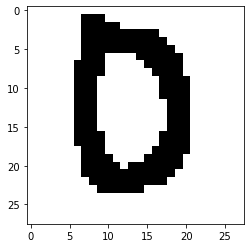

In [ ]:
print( len(x_train) )
print( len(y_train) )
tmp1 = x_train[0] # numpy, ndarray
print( len(tmp1) )
print( tmp1.shape )
print( y_train[0] )

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

def readRGBimg(img_path):
  nda = []
  img2=cv2.imread( img_path )
  print( type(img2) )
  #img2 = np.array(img2)
  print( img2.shape )
  rows = img2.shape[0]
  cols = img2.shape[1]
  #print( rows )
  #print( cols )
  for x in range(0, cols):
    r = []
    for y in range(0, rows):
      rgb = img2[x, y]
      #v = int((rgb[0] + rgb[1] + rgb[2])/3)
      v = int(rgb[0])
      v = v + int(rgb[1])
      v = v + int(rgb[2])
      v = int(v/3)
      #print (v)
      #print(rgb[0] + rgb[1] + rgb[2])
      v = (255 - v)/255
      r.append(v)
    nda.append(r)
  #print(len(nda))
  nda = np.array(nda)
  print( type(nda) )
  print( nda.shape )
  return nda

nda=readRGBimg("test.png")
#print(nda)

plt.imshow( nda, cmap=plt.cm.binary )
#plt.imshow( x_train[0], cmap=plt.cm.binary )
print(nda.shape)
print(x_test.shape)

print(len(x_test))
#predictions = new_model.predict( [x_test] )
#print( predictions )
empt_array = np.empty((1,28, 28), int)
empt_array[0] = nda
print(empt_array.shape)
predictions = new_model.predict( [empt_array] )
print( predictions )

print(np.argmax(predictions[0]))

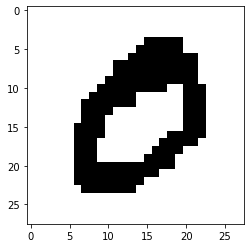

In [ ]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()